[Datasets](https://www.kaggle.com/paultimothymooney/breast-histopathology-images/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the necessary libraries first

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_crossentropy
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.optimizers import adam_v2
import cv2

In [ ]:
colors= {
  "Default":"\033[0m",
  "Green":"\033[32m",
  "Red":"\033[31m"
}

In [ ]:
from pathlib import Path
os.chdir("/content")
if not Path("kaggle.json").exists():
  f = open("kaggle.json", "w")
  f.write('{""}')# should write your kaggle username and password
  f.close()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
if not Path("breast-histopathology-images").exists():
  !kaggle datasets download -d paultimothymooney/breast-histopathology-images
  !unzip -q breast-histopathology-images.zip -d breast-histopathology-images
  !rm breast-histopathology-images.zip

 99% 3.08G/3.10G [00:17<00:00, 251MB/s]
100% 3.10G/3.10G [00:17<00:00, 188MB/s]


In [ ]:
Root = "/content/drive/MyDrive/"
os.chdir(Root)

In [ ]:
import os
from pathlib import Path
datasetPath = '/content/breast-histopathology-images'
classes=[0, 1]
dirs = os.listdir(datasetPath)
dataYes = 10000
dataNo  = 10000
yeslist = []
nolist  = []
filepaths=[]
labels=[]

for dir in dirs:
  if not (dir == ".ipynb_checkpoints" or dir == "IDC_regular_ps50_idx5"):
    noDir = datasetPath + "/" + dir + "/" + "0"
    for img in os.listdir(noDir):
      nolist.append(noDir + "/" + img)
    
    yesDir = datasetPath + "/" + dir + "/" + "1"
    for img in os.listdir(yesDir):
      yeslist.append(yesDir + "/" + img)

for i in range(0, dataNo):
  filepaths.append(nolist[i])
  labels.append(classes[0])

for i in range(0, dataYes):
  filepaths.append(yeslist[i])
  labels.append(classes[1]) 

In [ ]:
print (colors['Green'] + "filepaths: " + colors['Default'] + str(len(filepaths)))
print (colors['Green'] + "labels   : " + colors['Default'] + str(len(labels)))

filepaths: 20000
labels   : 20000


In [ ]:
Label=pd.Series(labels, name='labels')
y=pd.concat([Label], axis=1)
y=pd.DataFrame(np.array(y).reshape(len(filepaths),1), columns = ['labels'])
y.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [ ]:
dispaly(y)

NameError: ignored

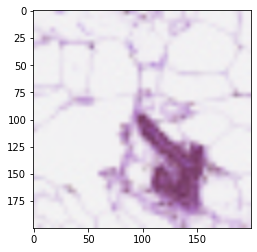

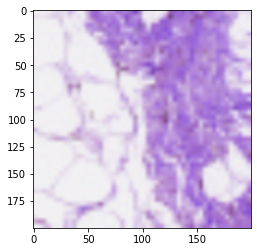

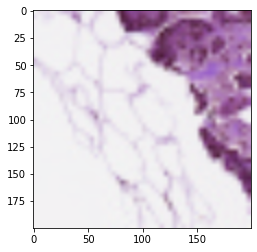

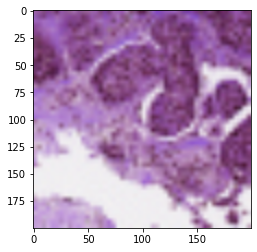

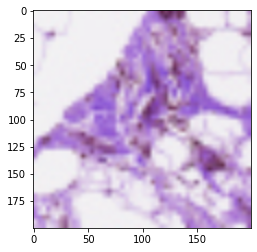

In [ ]:
import cv2
import matplotlib.pyplot as plt
for i in filepaths[:5]:
    img=cv2.imread(i)
    img_1=cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

In [ ]:
images=[]
labels=[]
for i in filepaths[:]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [ ]:
x=np.stack(images)

In [ ]:
#normalize the data
x=x/255

In [ ]:
images=[]
yeslist = []
nolist  = []
filepaths=[]

In [ ]:
print(x.shape )
print(y.shape)

(20000, 100, 100, 3)
(20000, 1)


In [ ]:
display(x)

array([[[[0.94509804, 0.94901961, 0.95686275],
         [0.94509804, 0.94901961, 0.95294118],
         [0.94901961, 0.94509804, 0.94901961],
         ...,
         [0.94509804, 0.94509804, 0.95294118],
         [0.94901961, 0.94509804, 0.94901961],
         [0.94901961, 0.94509804, 0.94901961]],

        [[0.94509804, 0.94901961, 0.95686275],
         [0.94509804, 0.94901961, 0.95294118],
         [0.94901961, 0.94509804, 0.95294118],
         ...,
         [0.94509804, 0.94509804, 0.95294118],
         [0.94901961, 0.94509804, 0.95294118],
         [0.94901961, 0.94509804, 0.94901961]],

        [[0.94509804, 0.94901961, 0.95686275],
         [0.94509804, 0.94901961, 0.95686275],
         [0.94901961, 0.94509804, 0.95294118],
         ...,
         [0.94509804, 0.94509804, 0.95294118],
         [0.94901961, 0.94509804, 0.95294118],
         [0.95294118, 0.94509804, 0.95294118]],

        ...,

        [[0.95686275, 0.94509804, 0.95294118],
         [0.94901961, 0.9372549 , 0.94509804]

In [ ]:
display(y)

,labels
0,0
1,0
2,0
3,0
4,0
...,...
19995,1
19996,1
19997,1
19998,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,shuffle=True)

In [ ]:
x=[]
y=[]

In [ ]:
labels=[]

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(16000, 100, 100, 3) (16000, 1) (4000, 100, 100, 3) (4000, 1)


In [ ]:
display(y_test)

,labels
19134,1
4981,0
16643,1
19117,1
5306,0
...,...
17088,1
11121,1
9861,0
14548,1


In [ ]:
display(x_test)

array([[[[0.94509804, 0.93333333, 0.94901961],
         [0.9372549 , 0.9254902 , 0.94117647],
         [0.92156863, 0.90588235, 0.9254902 ],
         ...,
         [0.94901961, 0.93333333, 0.94117647],
         [0.94509804, 0.9372549 , 0.9372549 ],
         [0.94509804, 0.94117647, 0.9372549 ]],

        [[0.94901961, 0.93333333, 0.94901961],
         [0.94117647, 0.9254902 , 0.94117647],
         [0.9254902 , 0.91372549, 0.92941176],
         ...,
         [0.94509804, 0.93333333, 0.94509804],
         [0.94509804, 0.9372549 , 0.94117647],
         [0.94509804, 0.9372549 , 0.94117647]],

        [[0.95294118, 0.93333333, 0.94509804],
         [0.94901961, 0.93333333, 0.94117647],
         [0.9372549 , 0.92941176, 0.94117647],
         ...,
         [0.94117647, 0.9372549 , 0.94509804],
         [0.94117647, 0.93333333, 0.94509804],
         [0.94509804, 0.92941176, 0.94509804]],

        ...,

        [[0.89411765, 0.84705882, 0.89019608],
         [0.80392157, 0.7254902 , 0.79215686]

**Transfer Learning**

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation = "sigmoid"))
    
    return model 
model = modelEfficientNetB0()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
from re import T
import datetime
model.load_weights('/content/drive/MyDrive/20epochsTumor_beforpca.h5')
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("100epochsTumor_beforpca.h5", save_best_only=True, verbose = 0)
]


from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])

history = model.fit(x_train, y_train, epochs = 100 ,validation_split=0.4,batch_size=56, verbose = 1,callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
172/172 [==============================] - 50s 180ms/step - loss: 0.2857 - acc: 0.8810 - val_loss: 0.5186 - val_acc: 0.7680
Epoch 2/100
172/172 [==============================] - 26s 150ms/step - loss: 0.2800 - acc: 0.8831 - val_loss: 0.8867 - val_acc: 0.5508
Epoch 3/100
172/172 [==============================] - 26s 150ms/step - loss: 0.2630 - acc: 0.8918 - val_loss: 0.6795 - val_acc: 0.7047
Epoch 4/100
172/172 [==============================] - 27s 158ms/step - loss: 0.2488 - acc: 0.8943 - val_loss: 0.9558 - val_acc: 0.5245
Epoch 5/100
172/172 [==============================] - 27s 155ms/step - loss: 0.2468 - acc: 0.8967 - val_loss: 0.8143 - val_acc: 0.6711
Epoch 6/100
172/172 [==============================] - 26s 153ms/step - loss: 0.2412 - acc: 0.8999 - val_loss: 1.1997 - val_acc: 0.4863
Epoch 7/100
172/172 [==============================] - 26s 154ms/step - loss: 0.2244 - acc: 0.9076 - val_loss: 0.7550 - val_acc: 0.6461
Epoch 8/100
172/172 [===========================

In [ ]:
model.save("100_my_idea.h5")

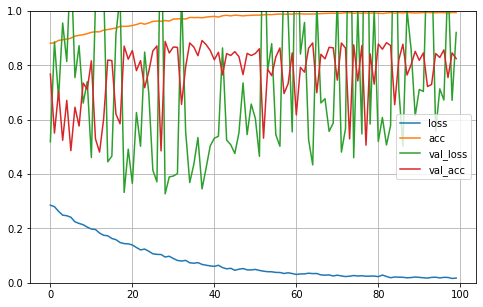

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
display(y_pred)

array([[0.16543134],
       [0.00170976],
       [0.14296058],
       ...,
       [0.00295358],
       [0.23865905],
       [0.01233284]], dtype=float32)

In [ ]:
y_predic=[]
for i in y_pred[:]:
  if i<=0.5:
    i=0
  else:
    i=1
  y_predic.append(i)


In [ ]:
display(y_predic)

array([[1811,  183],
       [ 554, 1452]])

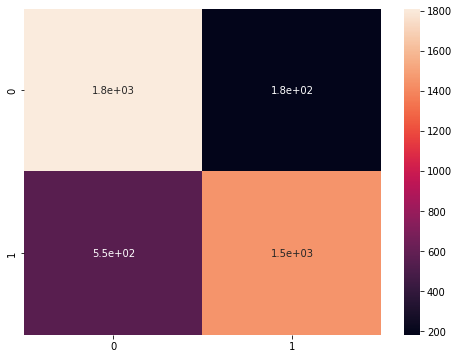

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn 
cm = confusion_matrix(y_test, y_predic)
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True)
cm

**Evaluating the model**

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def check(file):
  model_path = "/content/drive/MyDrive/modelbalance.h5"
  loaded_model = tf.keras.models.load_model(model_path)
  image = cv2.imread(file)
  image_fromarray = Image.fromarray(image, 'RGB')
  resize_image = image_fromarray.resize((224, 224))
  expand_input = np.expand_dims(resize_image,axis=0)
  input_data = np.array(expand_input)
  input_data = input_data/255
  pred = loaded_model.predict(input_data)
  if pred >= 0.5:
    return 1
  else:
    return 0

def printResult(file, result, type):
  print (file)
  print ("Result: " + classes[result])
  print ("Real  : " + type)


In [ ]:
testNo  = 50
testYes = 0
noSum   = 0
yesSum  = 0
doPrint = True 

for i in range(dataNo, (dataNo + testNo)):
  file = nolist[i]
  result = check(file)
  if doPrint:
    printResult(file, result, "No")
  if result == 0:
    noSum += 1
  else:
    yesSum += 1

for i in range(dataYes, (dataYes + testYes)):
  file = yeslist[i]
  result = check(file)
  if doPrint:
    printResult(file, result, "Yes")
  
  if result == 0:
    noSum += 1
  else:
    yesSum += 1

/content/breast-histopathology-images/9325/0/9325_idx5_x3201_y1051_class0.png
Result: 1
Real  : No
/content/breast-histopathology-images/9325/0/9325_idx5_x451_y301_class0.png
Result: 1
Real  : No
/content/breast-histopathology-images/9325/0/9325_idx5_x1901_y1851_class0.png
Result: 0
Real  : No
/content/breast-histopathology-images/9325/0/9325_idx5_x601_y501_class0.png
Result: 0
Real  : No
/content/breast-histopathology-images/9325/0/9325_idx5_x1151_y701_class0.png
Result: 0
Real  : No
/content/breast-histopathology-images/9325/0/9325_idx5_x2351_y651_class0.png
Result: 1
Real  : No
/content/breast-histopathology-images/9325/0/9325_idx5_x1501_y1151_class0.png
Result: 0
Real  : No
/content/breast-histopathology-images/9325/0/9325_idx5_x3201_y1851_class0.png
Result: 0
Real  : No
/content/breast-histopathology-images/9325/0/9325_idx5_x1101_y1301_class0.png
Result: 0
Real  : No
/content/breast-histopathology-images/9325/0/9325_idx5_x2701_y801_class0.png
Result: 1
Real  : No
/content/breast-h

In [ ]:
print (colors["Green"] + "Yes" + ": " + colors["Default"] + str(yesSum))
print (colors["Red"]   + "No " + ": " + colors["Default"] + str(noSum))

Yes: 16
No : 34


In [ ]:
testNo  = 0
testYes = 50
noSum   = 0
yesSum  = 0
doPrint = True 

for i in range(dataNo, (dataNo + testNo)):
  file = nolist[i]
  result = check(file)
  if doPrint:
    printResult(file, result, "No")
  if result == 0:
    noSum += 1
  else:
    yesSum += 1

for i in range(dataYes, (dataYes + testYes)):
  file = yeslist[i]
  result = check(file)
  if doPrint:
    printResult(file, result, "Yes")
  
  if result == 0:
    noSum += 1
  else:
    yesSum += 1

/content/breast-histopathology-images/10299/1/10299_idx5_x551_y1601_class1.png
Result: 1
Real  : Yes
/content/breast-histopathology-images/10299/1/10299_idx5_x1001_y1051_class1.png
Result: 1
Real  : Yes
/content/breast-histopathology-images/10299/1/10299_idx5_x901_y2301_class1.png
Result: 1
Real  : Yes
/content/breast-histopathology-images/10299/1/10299_idx5_x2001_y1901_class1.png
Result: 0
Real  : Yes
/content/breast-histopathology-images/10299/1/10299_idx5_x2051_y1801_class1.png
Result: 1
Real  : Yes
/content/breast-histopathology-images/10299/1/10299_idx5_x2051_y701_class1.png
Result: 0
Real  : Yes
/content/breast-histopathology-images/10299/1/10299_idx5_x1551_y2201_class1.png
Result: 0
Real  : Yes
/content/breast-histopathology-images/10299/1/10299_idx5_x2201_y1551_class1.png
Result: 1
Real  : Yes
/content/breast-histopathology-images/10299/1/10299_idx5_x1601_y701_class1.png
Result: 1
Real  : Yes
/content/breast-histopathology-images/10299/1/10299_idx5_x1451_y1001_class1.png
Result

In [ ]:
print (colors["Green"] + "Yes" + ": " + colors["Default"] + str(yesSum))
print (colors["Red"]   + "No " + ": " + colors["Default"] + str(noSum))

Yes: 41
No : 9
